In [1]:
# Import matplotlib
import matplotlib.pyplot as plt

# Other packages
import numpy as np
import xarray as xr

In [3]:
# As an example, we will extract again the time series of temperature over Oxford
ds = xr.open_dataset("../../data_samples/netcdf/E-OBS/UK_monthly.nc") # Open the dataset
T = ds.tg # Select the temperature variable
T_Oxford_monthly = T.interp(latitude = 51.75, longitude = -1.26,) # Interpolate the data for Oxford
T_Oxford_yearly = T_Oxford_monthly.groupby("time.year").mean()

In [4]:
T_Oxford_yearly

<xarray.DataArray 'tg' (year: 74)> Size: 296B
array([ 9.486155 ,  9.399342 ,  9.242272 ,  9.778832 ,  9.337019 ,
        9.365899 ,  8.8656845, 10.16284  ,  9.600312 , 10.557527 ,
        9.727736 , 10.040602 ,  8.416123 ,  8.253062 ,  9.38921  ,
        8.861951 ,  9.490979 ,  9.704366 ,  9.241546 ,  9.337692 ,
        9.648627 ,  9.647157 ,  9.285746 ,  9.572483 ,  9.552783 ,
        9.947022 , 10.070858 ,  9.41999  ,  9.326861 ,  8.893516 ,
        9.473062 ,  9.3230715,  9.9609   , 10.193952 ,  9.846    ,
        8.942193 ,  8.845136 ,  9.166455 ,  9.770743 , 10.749137 ,
       10.831357 ,  9.534713 ,  9.944239 ,  9.643683 , 10.454255 ,
       10.732524 ,  9.3921175, 10.77507  , 10.581927 , 10.784732 ,
       10.607278 , 10.215925 , 10.935917 , 10.701171 , 10.921917 ,
       10.85278  , 11.319606 , 10.842822 , 10.332376 , 10.618193 ,
        9.450906 , 11.1609955, 10.189301 ,  9.941052 , 11.297649 ,
       10.817997 , 10.6906595, 10.970546 , 11.048894 , 10.747806 ,
       11.2212715, 10.657563 , 11.631993 , 11.366539 ], dtype=float32)
Coordinates:
    latitude   float64 8B 51.88
    longitude  float64 8B -1.375
  * year       (year) int64 592B 1950 1951 1952 1953 ... 2020 2021 2022 2023
Attributes:
    standard_name:  air_temperature
    long_name:      mean temperature
    units:          Celsius
    cell_methods:   time: mean

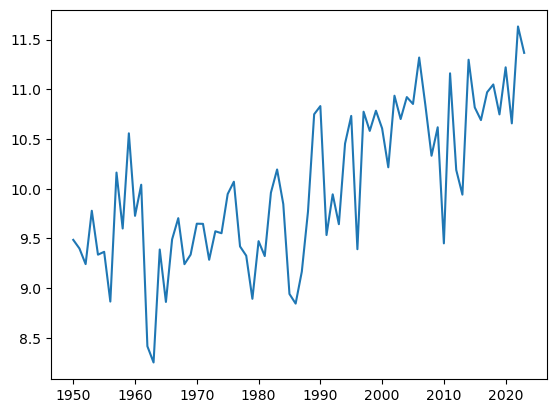

In [5]:
# Matplotlib can be used to create plots very rapidly in one line. For example, let us plot this time series:
plt.plot(T_Oxford_yearly.year, T_Oxford_yearly)
# However, this is somewhat redundant with the quick plot functions we have seen built-in pandas and xarray, 
# which is why we will focus here on building complete plots that can be complexified if necessary.

In [6]:
# Throughout the tutorial, do not hesitate to comment some parts to see what each line is doing individually

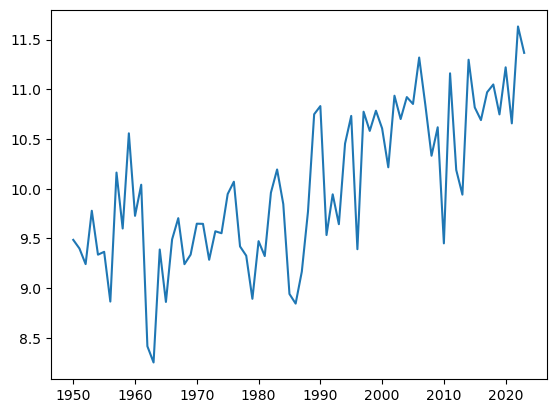

In [7]:
# Here is the basic structure of a plot
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.plot(T_Oxford_yearly.year, T_Oxford_yearly) # Plot the time series

## Potentially add some customizations here

## Show
plt.show()
# NB: plt.show() is not necessary in jupyter notebook, but it will be if you use the python terminal

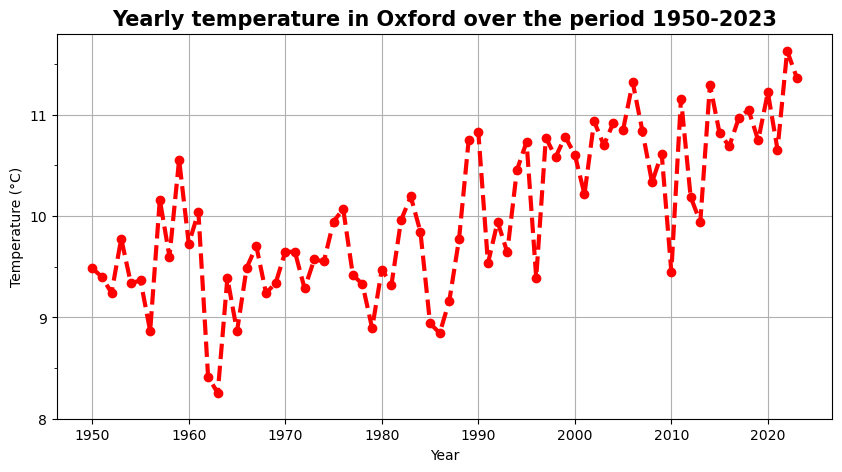

In [57]:
# Let us show some example of how you can customize this basic plot
## Setup the figure
fig = plt.figure(figsize = [10,5]) # Change the figure size with figsize = [width, height]
ax = plt.axes() 

## Add the graphics
ax.plot(T_Oxford_yearly.year, T_Oxford_yearly, 
       color = "red", linewidth = 3, linestyle = "--", # Change line color, width and style
       marker = 'o', # Add markers for data points 
       )

## Customizations
### Labels
ax.set_xlabel("Year") # Add a label for the x-axis
ax.set_ylabel("Temperature (°C)") # Add a label for the y-axis
ax.set_title("Yearly temperature in Oxford over the period 1950-2023", # Add a title
            fontsize = 15, fontweight = "bold") # Make the title font 15pt and bold
### Axes
ax.set_xticks(np.arange(1950,2025,10)) # Ticks for x-axis: Every ten years
ax.set_yticks(np.arange(8,12,1)) # Major ticks for y-axis: Every °C
ax.set_yticks(np.arange(8.5,12,1), minor = True) # Minor ticks for y-axis: Half °C
ax.grid() # Add grid

## Show
plt.show()

This figure summarizes many types of customizations (source: https://matplotlib.org/stable/users/explain/quick_start.html#quick-start)

<img src="anatomy.webp" style="width: 500px;"/>

In [ ]:
# Now try to customize it yourself: Change the figure size, the color, the labels...
# ...


## Different types of plot for 1D data

### Pairwise data

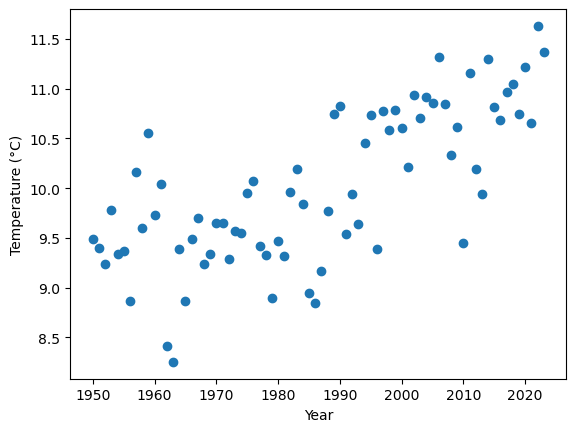

In [45]:
# scatterplot
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.scatter(T_Oxford_yearly.year, T_Oxford_yearly) # Plot the time series as scatter

# Customize
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (°C)")

## Show
plt.show()

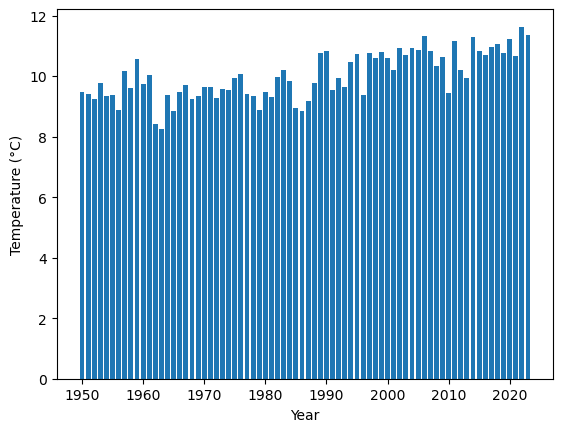

In [46]:
# barplot
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.bar(T_Oxford_yearly.year, T_Oxford_yearly) # Plot the time series as barplot

# Customize
ax.set_xlabel("Year")
ax.set_ylabel("Temperature (°C)")

## Show
plt.show()

### Statistical distributions

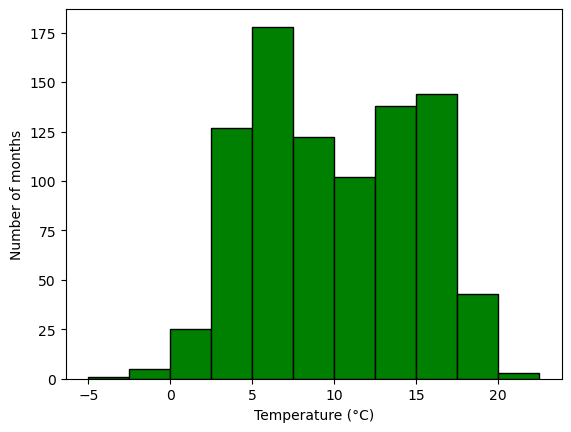

In [47]:
# histogram
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.hist(x = T_Oxford_monthly, # Plot the histogram
        bins = np.arange(-5,25,2.5), # Optionnal: You can define the bins to be used
        color = "green", edgecolor = 'k') # Customize: Change face and edge colors


# Customize
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Number of months")

## Show
plt.show()

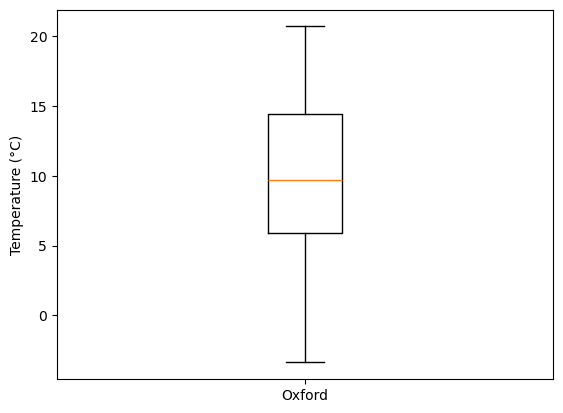

In [50]:
# Boxplot
## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.boxplot(x = T_Oxford_monthly) # Plot the distribution

# Customize
ax.set_ylabel("Temperature (°C)")
ax.set_xticks([1], ["Oxford"])

## Show
plt.show()

Explore other types of plots on this page : https://matplotlib.org/stable/plot_types/index.html

## Several data lines on the same plot

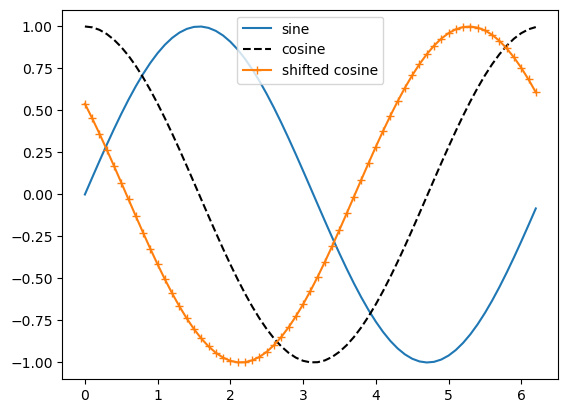

In [60]:
# Data generation
X = np.arange(0, 2*np.pi, 0.1)
sin = np.sin(X)
cos = np.cos(X)
cos_shifted = np.cos(X+1)

## Setup the figure
fig = plt.figure() # Create the figure
ax = plt.axes() # Create the axis 

## Add the graphics
ax.plot(X, sin, # Provide coordinates
        label = "sine", # provide label for legend
        )
ax.plot(X, cos, label = "cosine", # Coordinates, labels
        color = "black", linestyle = "--", # line customization
       )
ax.plot(X, cos2, label = "shifted cosine", 
        marker = "+", # Add markers
       )
ax.legend() # Displey the legend based on the provided labels

## Show
plt.show()

## Subplots
Sometimes, you will want to have several panels on the same figure, this is done using "subplots".

In [81]:
# Data preparation
ds = xr.open_dataset("../../data_samples/netcdf/E-OBS/UK_monthly.nc") # Open the dataset
T = ds.tg # Select the temperature variable
T_Oxford = T.interp(latitude = 51.75, longitude = -1.26,).groupby("time.year").mean() # Interpolate the data for Oxford and average over years
precip = ds.rr # Select the precip variable
precip_Oxford = precip.interp(latitude = 51.75, longitude = -1.26,).groupby("time.year").mean() 
P = ds.pp # Select the pressure variable
P_Oxford = P.interp(latitude = 51.75, longitude = -1.26,).groupby("time.year").mean() # Interpolate the data for Oxford

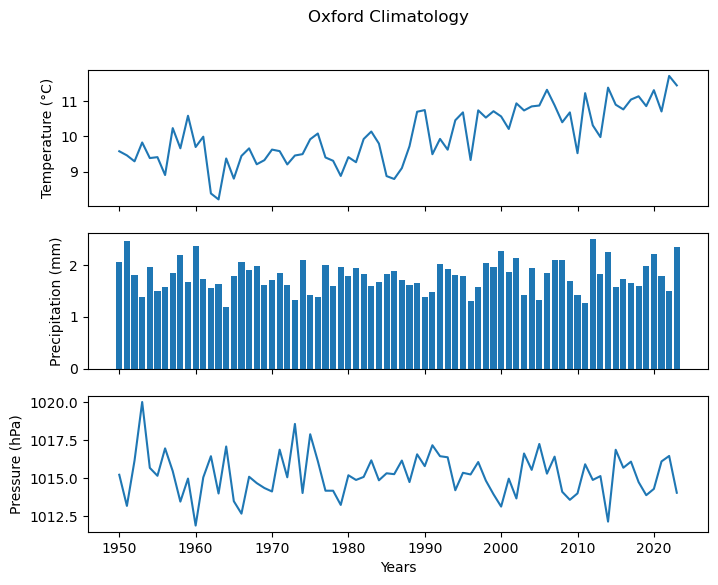

In [85]:
## Setup the figure
fig, axs = plt.subplots(3, # Create a subplot grid with 3 lines
                        sharex = True, # Make them share their x-axis
                       figsize = (8,6), # Change figure size
                       )

## Add the graphics
axs[0].plot(T_Oxford.year, T_Oxford)
axs[1].bar(precip_Oxford.year, precip_Oxford)
axs[2].plot(P_Oxford.year, P_Oxford)

## Customize
### Axes labels
axs[0].set_ylabel("Temperature (°C)")
axs[1].set_ylabel("Precipitation (mm)")
axs[2].set_ylabel("Pressure (hPa)")
axs[2].set_xlabel("Years")
### Figure-level labels
fig.suptitle("Oxford Climatology")

## Show
plt.show()

## Summary
These "cheatsheets" from https://matplotlib.org/cheatsheets/ summarize what we have seen (You can find them and others in the folder to save them): 
<img src="handout-beginner.webp" style="width: 1200px;"/>
<img src="handout-intermediate.webp" style="width: 1200px;"/>

Matplotlib is very powerful and can do many many things, more than we can cover. If you find yourself willing to do something that you don't know how to, here are some resources you can look for:
* The matplotlib documentation: https://matplotlib.org/stable/ When looking for a particular type of plot or customization, look out for the demo and examples, which are usually very instructive.
* Google (which will often redirect you to Stack Overflow)
* ChatGPT (Or, I suppose, any LLM)

Using solutions from ChatGPT or Stack Overflow will usually work especially if you are in a rush. However, in the long run, it is worth learning how matplotlib fundamentally works by using the documentation. 